# Lineární Regrese

Úloha zaměřená na implementaci lineární regrese pomocí metody LSE.

Data reprezentují výsledky zkoušky, konkrétně bodový zisk v závislosti na době studia.

Import knihoven:

In [1]:
import numpy as np
import usu

Načtení dat:

In [2]:
npzfile = np.load('data/data_02.npz')
npzfile.files


['x0', 'x1']

Přiřazení dat do nezávislé a závislé proměnné:

In [3]:
x = npzfile['x0']
y = npzfile['x1']
x.shape, y.shape # 100 radku a 1 sloupec


((100, 1), (100, 1))

Vykreslení dat:

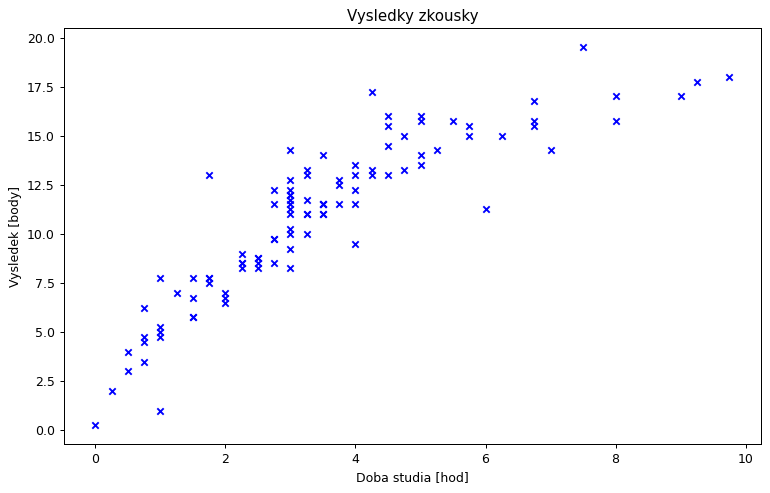

In [4]:
usu.draw(x, y, "Vysledky zkousky", "Doba studia [hod]", "Vysledek [body]")

## LSE (Least-Squares Estimation)


### Odhad parametrů $\theta$ :

$$ \theta = (\tilde{X^T} \tilde{X})^{-1} \tilde{X^T} y $$  
kde $\tilde{X}$ je rozšířená matice dat $X$ (je rozšířená o jeden sloupec s hodnotami 1)

#### Příklad matice $\tilde{X}$ pro lineární regresi:

$$
    X = 
        \begin{bmatrix}
        1 \\
        2 \\
        3\\
        \end{bmatrix} 
    \implies
        \tilde{X} = 
        \begin{bmatrix}
        1 & 1 \\
        1 & 2 \\
        1 & 3\\
        \end{bmatrix} 
$$


#### Příklad matice  $\tilde{X}$ pro polynomiální regresi:

* Každá vyšší mocnina $X$ je v případě PR považována za **další nezávislou proměnnou**.

$$
    X = 
        \begin{bmatrix}
        1 & 1 \\
        2 & 4 \\
        3 & 9 \\
        \end{bmatrix} 
    \implies
    \tilde{X} = 
        \begin{bmatrix}
        1 & 1 & 1 \\
        1 & 2 & 4 \\
        1 & 3 & 9 \\
        \end{bmatrix} 
$$


### Odhad  $\theta$ se zapojením regularizace:
$$ \theta = (\tilde{X^T} \tilde{X} + \lambda I)^{-1} \tilde{X^T} y $$  
kde $\lambda$ je koeficient regularizace (hyperparametr), $I$ je jednotková matice o rozměrech $n \times n$ ($n$ je počet sloupců matice $\tilde{X}$)

Funkce pro odhad parametrů theta:

In [5]:
def computeThetaLSE(x, y, order=1, lmbd=0):
    """
    x - vektor vstupnich hodnot (doba studia)
    y - vektor vystupnich  hodnot (zisk bodu)
    order - rad polynomu
    lmbd - regularizacni parametr lambda
    
    """
    print(x.shape, y.shape)
    # Sestavení rozšiřené matice X
    # X = np.hstack([np.ones((x.shape[0], 1)), x])
    X = np.hstack([x**i for i in range(order + 1)])
    rows, cols = X.shape
    theta = np.dot((np.dot(np.linalg.inv(np.dot(X.T, X) + lmbd * np.eye(cols)), X.T)), y)
    
    return theta

computeThetaLSE(np.array([[1], [2], [3]]), np.array([[5], [8], [11]]))

(3, 1) (3, 1)


array([[2.],
       [3.]])

Linearní regrese bez regularizace (polynom 1. řádu):

In [6]:
theta = computeThetaLSE(x, y)
print(theta)

(100, 1) (100, 1)
[[4.84319118]
 [1.74511077]]


Vykreslení výsledků regrese:

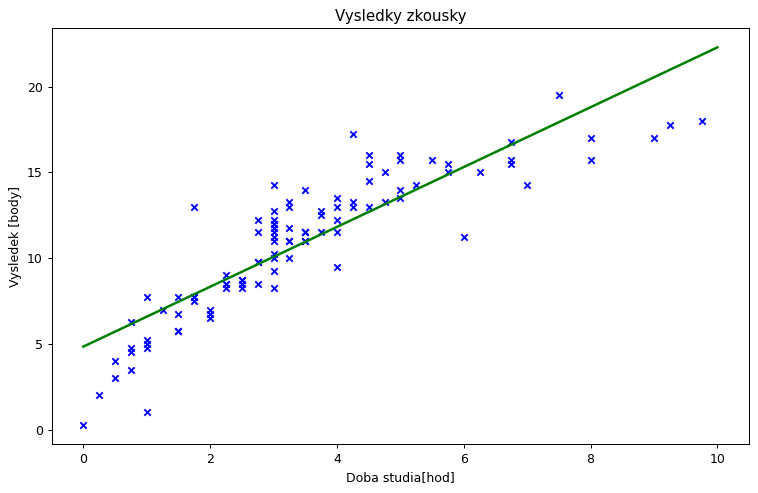

In [7]:
#vstupni paremetry do funkce usu.dra (theta, x a y) musi byt typu np.array nikoli matrix

usu.draw(x, y, "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta)

Určete předpokládaný zisk bodů v případě přípravy v délce 4 hodin:

x : 4.000, y : 11.824


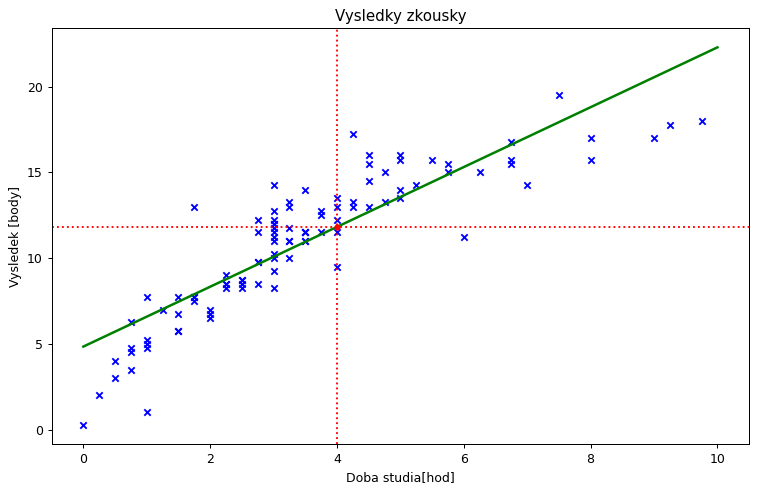

In [8]:
#################################################################
# ZDE DOPLNIT

valueX = 4
valueY = theta[0] + theta[1] * valueX  # theta0 + theta1*x + theta2*x^2 + ...
usu.draw(x, y, "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta, valueX, valueY)
#################################################################


Určete předpokládanou dobu studia v případě zisku 12 bodů:

x : 4.101, y : 12.000


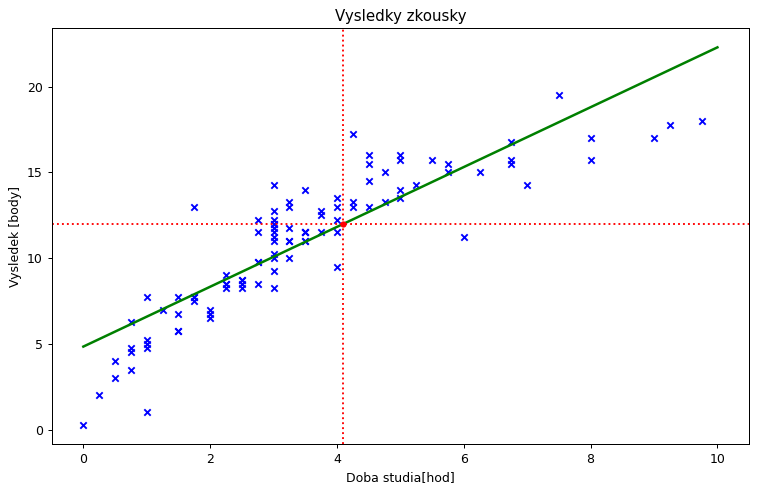

In [9]:
#################################################################
# ZDE DOPLNIT

valueY = 12
valueX = (valueY - theta[0]) / theta[1] 

#################################################################

usu.draw(x, y, "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta, valueX, valueY)


### Polynomiální regrese

Určete předpokládaný zisk bodů v případě přípravy v délce 4 hodin, řádu polynomu 2 a 𝜆 1:

(100, 1) (100, 1)
x : 4.000, y : 12.844


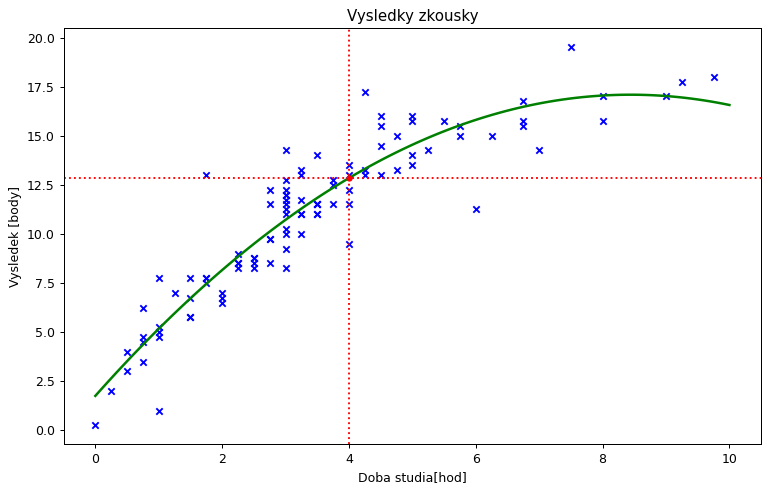

In [10]:
order = 2
lmbd = 1
theta = computeThetaLSE(x, y, order, lmbd)

#################################################################
# ZDE DOPLNIT

valueX = 4
valueY = sum(theta[i] * valueX**i for i in range(order + 1)) # theta0 + theta1*x + theta2*x^2 + ...
# v tomto příkladu vybíráme order=2
# model zachytí zakřivení, ale nepřetížíme model zbytečně vysokým řádem.

#################################################################

usu.draw(x, y, "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta, valueX, valueY)


### Exponenciální regrese

Reší se jako lineární regrese pro data s hodnotami $[x,\log{(y)}]$

In [11]:
npzfile = np.load('data/data_02_exp.npz')
npzfile.files

['x0', 'x1']

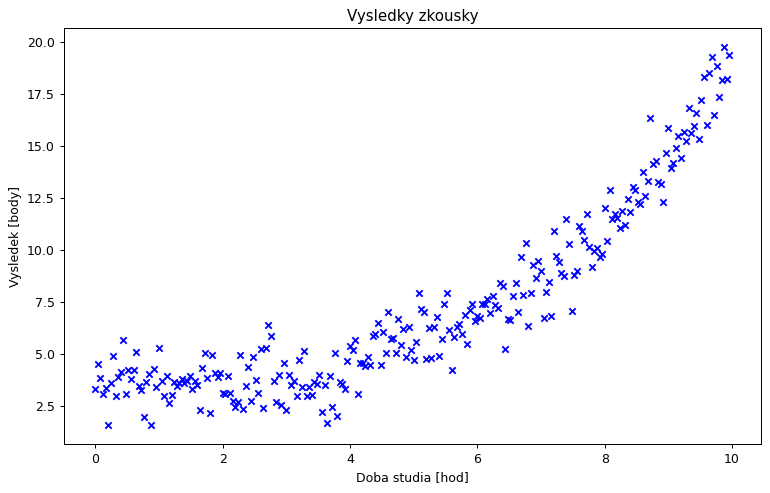

In [12]:
x_exp = npzfile['x0']
y_exp = npzfile['x1']
usu.draw(x_exp, y_exp, "Vysledky zkousky", "Doba studia [hod]", "Vysledek [body]")


(250, 1) (250, 1)


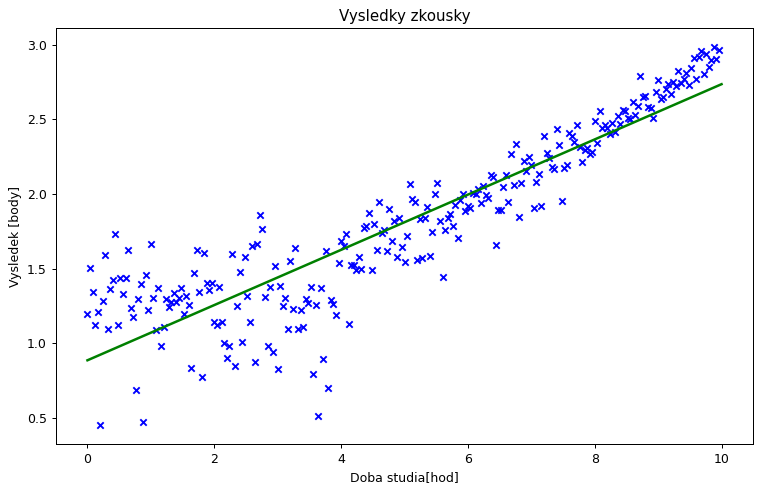

In [13]:
#################################################################
# ZDE DOPLNIT

theta = computeThetaLSE(x_exp, np.log(y_exp), 1, 1)
usu.draw(x_exp, np.log(y_exp), "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta)

#################################################################


Určete předpokládaný zisk bodů v případě přípravy v délce 4 hodin:

Doba studia: 9
Předp. zisk bodů: 12.813837374526116
x : 9.000, y : 12.814


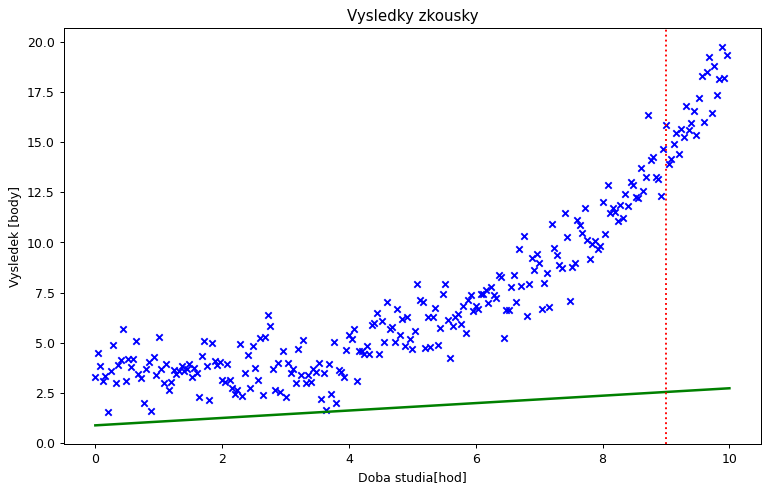

In [14]:
#################################################################
# ZDE DOPLNIT

valueX = 9
valueY = np.exp(theta[0] + theta[1] * valueX)
print(f"Doba studia: {valueX}")
print(f"Předp. zisk bodů: {valueY[0]}")
usu.draw(x_exp, y_exp, "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta, valueX, valueY)

#################################################################
